<a href="https://colab.research.google.com/github/Sridurga-700758430/ICP3-700758430/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


data = pd.read_csv('/content/sample_data/Salary_Data (2) (1).csv')
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [6]:
from sklearn.model_selection import train_test_split


X = data[['YearsExperience']]
y = data['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (20, 1)
Test data shape: (10, 1)


In [12]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
msqua_train = mean_squared_error(y_train, y_train_pred)
msqua_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error of Train: {msqua_train}")
print(f"Mean Squared Error of Test: {msqua_test}")

Mean Squared Error of Train: 29793161.082422983
Mean Squared Error of Test: 35301898.887134895


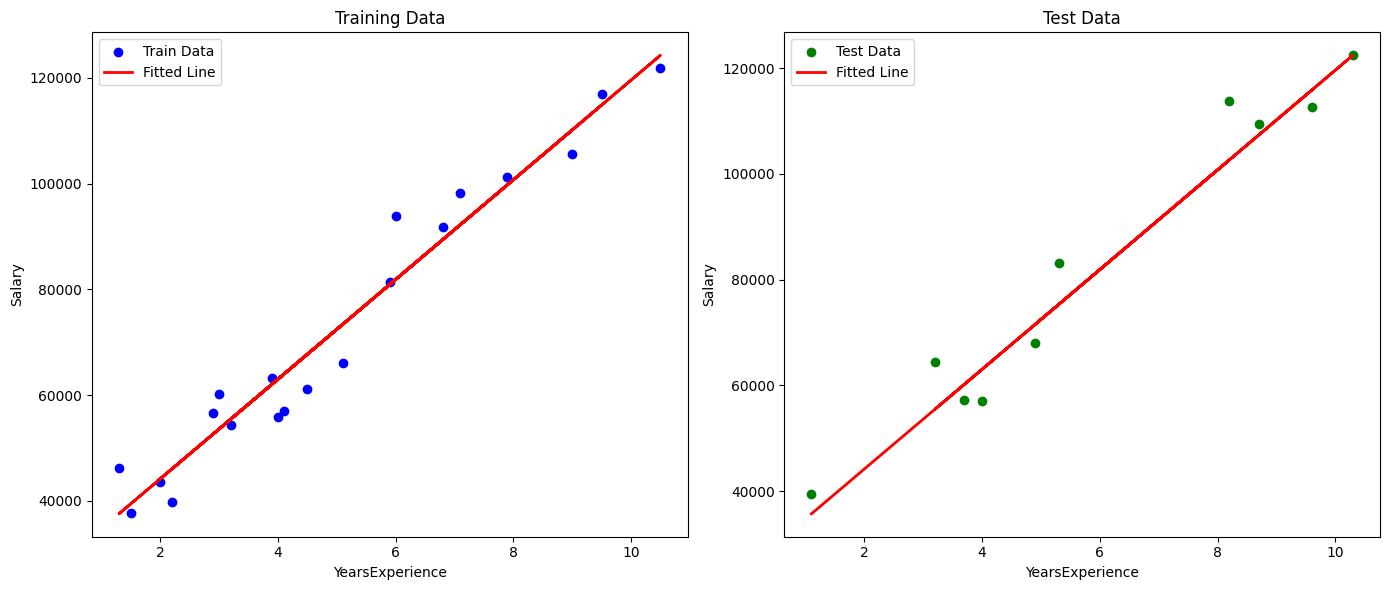

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Training Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Test Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/data.csv')

df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [22]:
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [24]:
df['Calories'].fillna(df['Calories'].mean(),inplace=True)# replacing the null values with mean
df['Calories'].isnull().sum() #checking if null still exists

0

In [25]:
df.groupby(['Duration','Pulse']).agg({'Calories':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})#aggregation of duration,pulse using calories and Maxpulse

Calories                       Maxpulse                  
                    min     max count    mean      min  max count   mean
Duration Pulse                                                          
15       80        50.5    50.5     1    50.5      100  100     1  100.0
         124      124.2   124.2     1   124.2      139  139     1  139.0
20       83        50.3    50.3     1    50.3      107  107     1  107.0
         95        77.7    77.7     1    77.7      112  112     1  112.0
         106      110.4   110.4     1   110.4      136  136     1  136.0
...                 ...     ...   ...     ...      ...  ...   ...    ...
180      101      600.1   600.1     1   600.1      127  127     1  127.0
210      108     1376.0  1376.0     1  1376.0      160  160     1  160.0
         137     1860.4  1860.4     1  1860.4      184  184     1  184.0
270      100     1729.0  1729.0     1  1729.0      131  131     1  131.0
300      108     1500.2  1500.2     1  1500.2      143  143     1  143.0

[94 rows x 8 columns]

In [26]:
df[(df['Calories'].between(500,1000))]#calories between 500 and 1000 data

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [27]:
df[(df['Calories'] > 500) & (df['Pulse'] <= 100)]#calories >500 and pulse<100 data

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
79,270,100,131,1729.0
87,120,100,157,1000.1
99,90,93,124,604.1
103,90,90,100,500.4


In [28]:
df_modified=df.loc[:,df.columns!='Maxpulse']
df_modified#df without maxpulse

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [29]:
df.drop('Maxpulse',axis=1) #detlting Maxpulse in the main df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [30]:
df['Calories']=df['Calories'].astype(int)#converting the data type to int
type(df['Calories'][0])

numpy.int64

<Axes: xlabel='Duration', ylabel='Calories'>

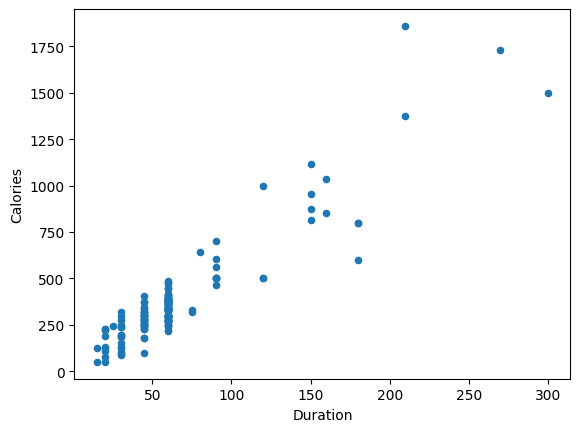

In [31]:
df.plot.scatter(x='Duration',y='Calories')